# AI-Generated Notebook for DANDI dataset 000673

**Disclaimer:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Use caution when interpreting the code or results.

This notebook provides an introduction to the Dandiset 000673, which contains data for the study "Control of working memory by phase–amplitude coupling of human hippocampal neurons."

The dataset includes electrophysiological recordings and behavior from the Sternberg task performed in patients with intractable epilepsy implanted with depth electrodes and Behnke-Fried microwires in the human medial temporal lobe and medial frontal cortex.

## Dataset Metadata

*   **Name:** Data for: Control of working memory by phase–amplitude coupling of human hippocampal neurons
*   **Description:** Retaining information in working memory is a demanding process that relies on cognitive control to protect memoranda-specific persistent activity from interference. However, how cognitive control regulates working memory storage is unclear. Here we show that interactions of frontal control and hippocampal persistent activity are coordinated by theta–gamma phase–amplitude coupling (TG-PAC). We recorded single neurons in the human medial temporal and frontal lobe while patients maintained multiple items in their working memory. In the hippocampus, TG-PAC was indicative of working memory load and quality. We identified cells that selectively spiked during nonlinear interactions of theta phase and gamma amplitude. The spike timing of these PAC neurons was coordinated with frontal theta activity when cognitive control demand was high. By introducing noise correlations with persistently active neurons in the hippocampus, PAC neurons shaped the geometry of the population code. This led to higher-fidelity representations of working memory content that were associated with improved behaviour. Our results support a multicomponent architecture of working memory, with frontal control managing maintenance of working memory content in storage-related areas. Within this framework, hippocampal TG-PAC integrates cognitive control and working memory storage across brain areas, thereby suggesting a potential mechanism for top-down control over sensory-driven processes.

*   **Number of Files:** 44
*   **Number of Subjects:** 36


## Getting Started

Before you begin, you will need to install the following packages:
```bash
pip install lindi pynwb matplotlib seaborn dandi
```

In [1]:
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("000673")
assets = list(dandiset.get_assets())
print(f"Number of assets in Dandiset 000673: {len(assets)}")
for i in range(min(5, len(assets))):
  print(f"Asset {i}: {assets[i].path}")

Number of assets in Dandiset 000673: 44
Asset 0: sub-11/sub-11_ses-1_ecephys+image.nwb
Asset 1: sub-12/sub-12_ses-1_ecephys+image.nwb
Asset 2: sub-1/sub-1_ses-1_ecephys+image.nwb
Asset 3: sub-1/sub-1_ses-2_ecephys+image.nwb
Asset 4: sub-10/sub-10_ses-1_ecephys+image.nwb


## Loading and Exploring the Dataset Structure

This section demonstrates how to load and explore the dataset structure using `lindi` and `pynwb`.

In [2]:
import pynwb
import lindi
import numpy as np

# Load the NWB file
# Replace with the path to your NWB file
nwb_file_url = "https://lindi.neurosift.org/dandi/dandisets/000673/assets/65a7e913-45c7-48db-bf19-b9f5e910110a/nwb.lindi.json"
f = lindi.LindiH5pyFile.from_lindi_file(nwb_file_url)
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Print some basic information about the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")

/opt/hostedtoolcache/Python/3.11.11/x64/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/hostedtoolcache/Python/3.11.11/x64/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/hostedtoolcache/Python/3.11.11/x64/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: SBCAT_ID: 1
Identifier: sub-1_ses-1_P55CS
Session start time: 2018-01-01 00:00:00-08:00


## Accessing and Visualizing Sample Data

This section demonstrates how to access and visualize sample data from the NWB file.

We will start by plotting the LFP data for a few channels over a short time window.

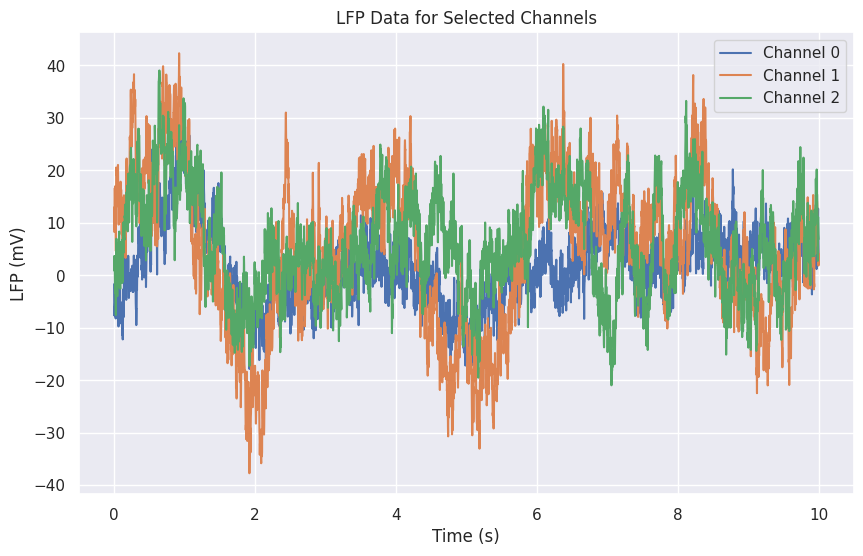

Channel Locations:
Channel 0: x=-4.14, y=28.97, z=24.6, location=dorsal_anterior_cingulate_cortex_left
Channel 1: x=-4.14, y=28.97, z=24.6, location=dorsal_anterior_cingulate_cortex_left
Channel 2: x=-4.14, y=28.97, z=24.6, location=dorsal_anterior_cingulate_cortex_left


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Get the LFP data
LFPs = nwb.acquisition["LFPs"]
lfp_data = LFPs.data
electrodes = LFPs.electrodes

# Select a few channels to plot
channel_ids = [0, 1, 2]

# Select a time window to plot (first 10 seconds)
start_time = 0
end_time = 10
start_index = int(start_time * LFPs.rate)
end_index = int(end_time * LFPs.rate)

# Generate timestamps if they don't exist
if LFPs.timestamps is None:
    timestamps = np.arange(LFPs.starting_time, LFPs.starting_time + lfp_data.shape[0] / LFPs.rate, 1 / LFPs.rate)
else:
    timestamps = LFPs.timestamps[:]

# Plot the LFP data for each channel
plt.figure(figsize=(10, 6))
for channel_id in channel_ids:
    channel_index = np.where(electrodes["id"].data[:] == channel_id)[0][0]
    plt.plot(timestamps[start_index:end_index], lfp_data[start_index:end_index, channel_index], label=f"Channel {channel_id}")

plt.xlabel("Time (s)")
plt.ylabel("LFP (mV)")
plt.title("LFP Data for Selected Channels")
plt.legend()
plt.show()

# Display channel locations
print("Channel Locations:")
for channel_id in channel_ids:
    channel_index = np.where(electrodes["id"].data[:] == channel_id)[0][0]
    x = electrodes["x"].data[channel_index]
    y = electrodes["y"].data[channel_index]
    z = electrodes["z"].data[channel_index]
    location = electrodes["location"].data[channel_index]
    print(f"Channel {channel_id}: x={x}, y={y}, z={z}, location={location}")

Now, we will plot the spike times for a few units.

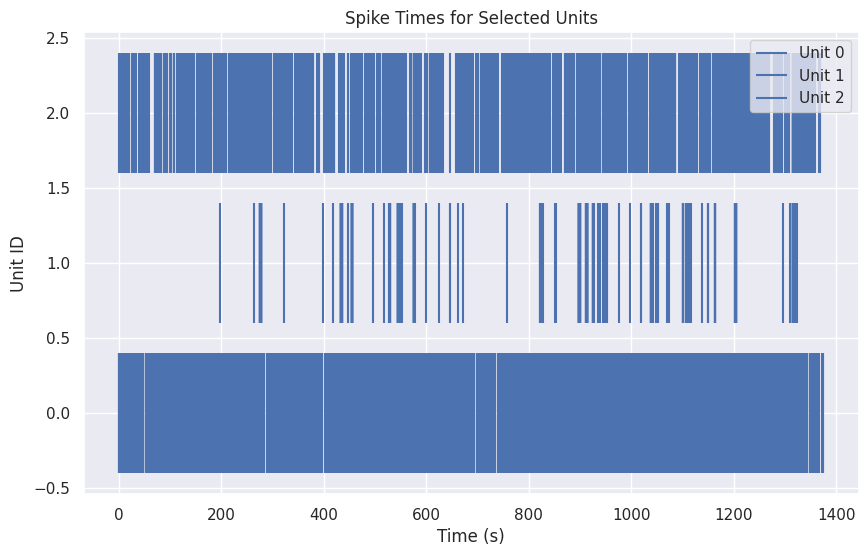

In [4]:
# Get the units data
units = nwb.units

# Select a few units to plot
unit_ids = [0, 1, 2]

# Plot the spike times for each unit
plt.figure(figsize=(10, 6))
for unit_id in unit_ids:
    spike_times = units["spike_times"][unit_id]
    plt.vlines(spike_times, unit_id - 0.4, unit_id + 0.4, label=f"Unit {unit_id}")

plt.xlabel("Time (s)")
plt.ylabel("Unit ID")
plt.title("Spike Times for Selected Units")
plt.legend()
plt.show()

## Examples of Common Analyses

This section provides examples of common analyses that might be relevant to the dataset's content.

1.  **LFP Power Spectral Density:** Calculate the power spectral density of the LFP data to identify dominant frequencies.
2.  **Spike Rate Analysis:** Calculate the spike rate for each unit and examine how it changes over time or in response to different stimuli.
3.  **Spike-LFP Coherence:** Calculate the coherence between spike times and LFP data to investigate the relationship between single-unit activity and local field potentials.
4.  **Trial-Averaged LFP:** Calculate the trial-averaged LFP to examine how the LFP changes in response to different stimuli during the Sternberg task.